In [1]:
# !pip install ray

In [5]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import json
from datetime import datetime
import swifter
from tqdm.notebook import tqdm
import numpy as np
import torch.nn as nn
import torch
import math
from sklearn.metrics.pairwise import cosine_similarity
from ray.util.multiprocessing import Pool


pd.set_option('display.max_rows', 500)
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
n_dim = 512

class PositionalEncoding(nn.Module):
    def __init__(self, n_dim):
        self.n_dim = n_dim
    
    def positional_encoding(self, position):
        pe = [list(range(self.n_dim))]
        for i in range(0, self.n_dim, 2):
            pe[0][i] = math.sin(position / (10000 ** ((2 * i) / self.n_dim)))
            pe[0][i+1] = math.cos(position / (10000 ** ((2 * i) / self.n_dim)))
        return pe

pe = PositionalEncoding(n_dim=n_dim)

pe_02 = pe.positional_encoding(2)
pe_10 = pe.positional_encoding(10)

In [29]:
pe_00 = pe.positional_encoding(0)
def f(index):
    return cosine_similarity(pe_02, pe.positional_encoding(index))[0][0]

pool = Pool()
df = pd.DataFrame({'position': range(n_dim), 'cosine_similarity': pool.map(f, range(n_dim))})

<AxesSubplot: xlabel='position'>

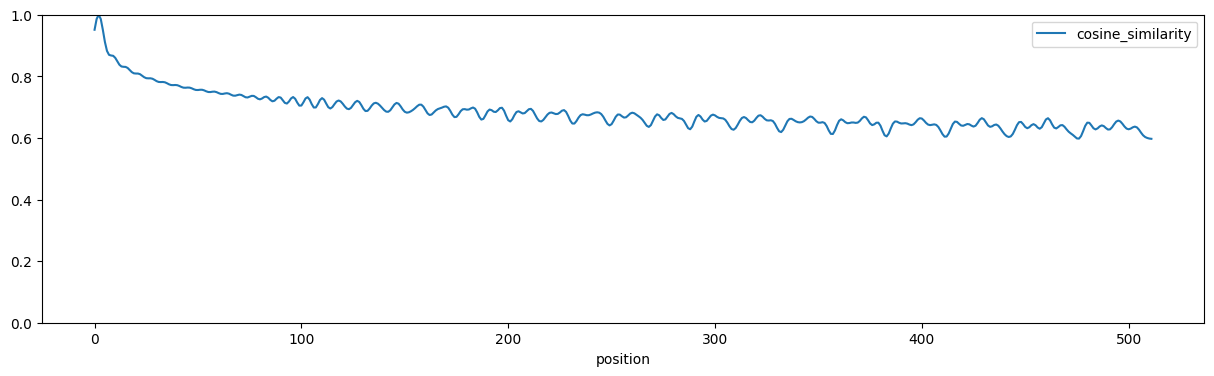

(raylet) [2023-05-06 11:12:22,833 E 5811 8082543] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-05-06_09-21-15_248541_749 is over 95% full, available space: 6118793216; capacity: 245107195904. Object creation will fail if spilling is required.
(raylet) [2023-05-06 11:12:32,921 E 5811 8082543] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-05-06_09-21-15_248541_749 is over 95% full, available space: 6118670336; capacity: 245107195904. Object creation will fail if spilling is required.
(raylet) [2023-05-06 11:12:43,009 E 5811 8082543] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-05-06_09-21-15_248541_749 is over 95% full, available space: 6118535168; capacity: 245107195904. Object creation will fail if spilling is required.
(raylet) [2023-05-06 11:12:53,091 E 5811 8082543] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-05-06_09-21-15_248541_749 is over 95% full, available space: 6118158336; capacity: 245107195904. Object creation will fa

In [30]:
df.plot(x='position', ylim=(0, 1), figsize=(15, 4))

In [26]:
cosine_similarity(pe_02, pe_10)[0][0]

0.8600013331392371